In [2]:
import requests # allows us to make web requests
import json # json is a dataformat useful for exchanging information
import pandas as pd
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


In [3]:

# URL of the CSV file (example)
url_19_20 = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/merged_gw.csv"
url_20_21 = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/gws/merged_gw.csv"
url_21_22 = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/gws/merged_gw.csv"
url_22_23 = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv"
url_23_24 = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/merged_gw.csv"


# Read the CSV file into a pandas DataFrame
df_17_18 = pd.read_csv("/content/merged_gw_1718.csv", encoding='latin1')
df_18_19 = pd.read_csv("/content/merged_gw_1819.csv", encoding='latin1')
df_19_20 = pd.read_csv(url_19_20)
df_20_21 = pd.read_csv(url_20_21)
df_21_22 = pd.read_csv(url_21_22)
df_22_23 = pd.read_csv(url_22_23)
df_23_24 = pd.read_csv(url_23_24)



In [4]:
# Data Cleaning

In [5]:
# name cleanup for early seasons


def clean_name(df):
    df["name"] = df["name"].str.replace(r'_\d+$', '', regex=True)  # remove trailing _digits
    df["name"] = df["name"].str.replace('_', ' ')                  # replace underscores with spaces


clean_name(df_17_18)
clean_name(df_18_19)
clean_name(df_19_20)


In [6]:
# data cleaning

# scale values correctly
def scale_value(df):
    df["value"] = df["value"] / 10

scale_value(df_17_18)
scale_value(df_18_19)
scale_value(df_19_20)
scale_value(df_20_21)
scale_value(df_21_22)
scale_value(df_22_23)
scale_value(df_23_24)



def initial_values(df):
    initial = df[df.GW == 1][["name", "value"]].drop_duplicates(subset="name")
    df["initial_value"] = df["name"].map(initial.set_index("name")["value"])

initial_values(df_17_18)
initial_values(df_18_19)
initial_values(df_19_20)
initial_values(df_20_21)
initial_values(df_21_22)
initial_values(df_22_23)
initial_values(df_23_24)


def season_total_points(dataframe):
  season_total_points = dataframe.groupby("name").agg({"total_points":"sum"})
  dataframe["season_total_points"] = dataframe["name"].map(season_total_points["total_points"])

season_total_points(df_17_18)
season_total_points(df_18_19)
season_total_points(df_19_20)
season_total_points(df_20_21)
season_total_points(df_21_22)
season_total_points(df_22_23)
season_total_points(df_23_24)


def season_avg_points(dataframe):
  season_avg_points = dataframe.groupby("name").agg({"total_points":"mean"})
  dataframe["season_avg_points"] = dataframe["name"].map(season_avg_points["total_points"])

season_avg_points(df_17_18)
season_avg_points(df_18_19)
season_avg_points(df_19_20)
season_avg_points(df_20_21)
season_avg_points(df_21_22)
season_avg_points(df_22_23)
season_avg_points(df_23_24)


def season_vol_points(dataframe):
  season_vol_points = dataframe.groupby("name").agg({"total_points":"std"})
  dataframe["season_vol_points"] = dataframe["name"].map(season_vol_points["total_points"])

season_vol_points(df_17_18)
season_vol_points(df_18_19)
season_vol_points(df_19_20)
season_vol_points(df_20_21)
season_vol_points(df_21_22)
season_vol_points(df_22_23)
season_vol_points(df_23_24)


def season_minutes(df):
  season_minutes = df.groupby("name").agg({"minutes":"sum"})
  df["season_minutes"] = df["name"].map(season_minutes["minutes"])

season_minutes(df_17_18)
season_minutes(df_18_19)
season_minutes(df_19_20)
season_minutes(df_20_21)
season_minutes(df_21_22)
season_minutes(df_22_23)
season_minutes(df_23_24)


def next_season_price(df,df2):
  next_season_initial_value = df2.drop_duplicates(subset="name").set_index("name")["initial_value"]
  df["next_season_initial_value"] = df["name"].map(next_season_initial_value)

next_season_price(df_17_18,df_18_19)
next_season_price(df_18_19,df_19_20)
next_season_price(df_19_20,df_20_21)
next_season_price(df_20_21,df_21_22)
next_season_price(df_21_22,df_22_23)
next_season_price(df_21_22,df_22_23)
next_season_price(df_22_23,df_23_24)


def next_season_points(df,df2):
  next_season_points = df2.drop_duplicates(subset="name").set_index("name")["season_total_points"]
  df["next_season_points"] = df["name"].map(next_season_points)

next_season_points(df_17_18,df_18_19)
next_season_points(df_18_19,df_19_20)
next_season_points(df_19_20,df_20_21)
next_season_points(df_20_21,df_21_22)
next_season_points(df_21_22,df_22_23)
next_season_points(df_21_22,df_22_23)
next_season_points(df_22_23,df_23_24)





In [7]:
df_17_18.columns

Index(['name', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards', 'GW',
       'initial_value', 'season_total_points', 'season_avg

In [8]:
# team remapping for early seasons
# 17/18 -> 19/20 do not have the player's team name in the dataframe

##### 17/18
df_17_18_team_map = { 1: 'Arsenal', 2: 'Bournemouth', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea',
  6: 'Crystal Palace', 7: 'Everton', 8: 'Huddersfield', 9: 'Leicester',
  10: 'Liverpool', 11: 'Man City', 12: 'Man Utd', 13: 'Newcastle', 14: 'Southampton',
  15: 'Spurs', 16: 'Stoke', 17: 'Swansea', 18: 'Watford', 19: 'West Brom', 20: 'West Ham'}

df_17_18_gw1_matches_map = {
    'Man Utd': 'West Ham', 'West Ham': 'Man Utd',
    'Newcastle': 'Spurs', 'Spurs': 'Newcastle',
    'Brighton': 'Man City', 'Man City': 'Brighton',
    'Chelsea': 'Burnley', 'Burnley': 'Chelsea',
    'Crystal Palace': 'Huddersfield', 'Huddersfield': 'Crystal Palace',
    'Everton': 'Stoke', 'Stoke': 'Everton',
    'Southampton': 'Swansea', 'Swansea': 'Southampton',
    'West Brom': 'Bournemouth', 'Bournemouth': 'West Brom',
    'Watford': 'Liverpool', 'Liverpool': 'Watford',
    'Arsenal': 'Leicester', 'Leicester': 'Arsenal'}

df_17_18["opponent_team_name"] = df_17_18["opponent_team"].map(df_17_18_team_map)
df_17_18_gw1 = df_17_18[df_17_18["GW"] == 1]
df_17_18_gw1["team"] = df_17_18_gw1["opponent_team_name"].map(df_17_18_gw1_matches_map)
df_17_18_player_team_map = df_17_18_gw1[["name","team"]].set_index("name")
df_17_18["team"] = df_17_18["name"].map(df_17_18_player_team_map["team"])
df_17_18[df_17_18.name == "Álvaro Morata"]



##### 18/19
df_18_19_team_map = {
    1: 'Arsenal', 2: 'Bournemouth', 3: 'Brighton', 4: 'Burnley', 5: 'Cardiff',
    6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton', 9: 'Fulham', 10: 'Huddersfield',
    11: 'Leicester', 12: 'Liverpool', 13: 'Man City', 14: 'Man Utd', 15: 'Newcastle',
    16: 'Southampton', 17: 'Spurs', 18: 'Watford', 19: 'West Ham', 20: 'Wolves'}


df_18_19_gw1_matches_map = {
    'Arsenal': 'Man City', 'Man City': 'Arsenal',
    'Liverpool': 'West Ham', 'West Ham': 'Liverpool',
    'Southampton': 'Burnley', 'Burnley': 'Southampton',
    'Wolves': 'Everton', 'Everton': 'Wolves',
    'Bournemouth': 'Cardiff', 'Cardiff': 'Bournemouth',
    'Fulham': 'Crystal Palace', 'Crystal Palace': 'Fulham',
    'Huddersfield': 'Chelsea', 'Chelsea': 'Huddersfield',
    'Watford': 'Brighton', 'Brighton': 'Watford',
    'Newcastle': 'Spurs', 'Spurs': 'Newcastle',
    'Man Utd': 'Leicester', 'Leicester': 'Man Utd'}

df_18_19["opponent_team_name"] = df_18_19["opponent_team"].map(df_18_19_team_map)
df_18_19_gw1 = df_18_19[df_18_19["GW"] == 1]
df_18_19_gw1["team"] = df_18_19_gw1["opponent_team_name"].map(df_18_19_gw1_matches_map)
df_18_19_gw1.drop_duplicates(subset="name",inplace=True)
df_18_19_player_team_map = df_18_19_gw1[["name","team"]].set_index("name")
df_18_19["team"] = df_18_19["name"].map(df_18_19_player_team_map["team"])

# ##### 19/20
df_19_20_team_map = {1: 'Arsenal', 2: 'Aston Villa', 3: 'Bournemouth', 4: 'Brighton', 5: 'Burnley',
    6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton', 9: 'Leicester', 10: 'Liverpool',
    11: 'Man City', 12: 'Man Utd', 13: 'Newcastle', 14: 'Norwich', 15: 'Sheff Utd',
    16: 'Southampton', 17: 'Spurs', 18: 'Watford', 19: 'West Ham', 20: 'Wolves'}

df_19_20_gw1_matches_map = {'Arsenal': 'Newcastle', 'Newcastle': 'Arsenal',
    'Aston Villa': 'Spurs', 'Spurs': 'Aston Villa',
    'Bournemouth': 'Sheff Utd', 'Sheff Utd': 'Bournemouth',
    'Brighton': 'Watford', 'Watford': 'Brighton',
    'Burnley': 'Southampton', 'Southampton': 'Burnley',
    'Chelsea': 'Man Utd', 'Man Utd': 'Chelsea',
    'Crystal Palace': 'Everton', 'Everton': 'Crystal Palace',
    'Leicester': 'Wolves', 'Wolves': 'Leicester',
    'Liverpool': 'Norwich', 'Norwich': 'Liverpool',
    'Man City': 'West Ham', 'West Ham': 'Man City'}

df_19_20["opponent_team_name"] = df_19_20["opponent_team"].map(df_19_20_team_map)
df_19_20_gw1 = df_19_20[df_19_20["GW"] == 1]
df_19_20_gw1["team"] = df_19_20_gw1["opponent_team_name"].map(df_19_20_gw1_matches_map)
df_19_20_gw1.drop_duplicates(subset="name",inplace=True)
df_19_20_player_team_map = df_19_20_gw1[["name","team"]].set_index("name")
df_19_20["team"] = df_19_20["name"].map(df_19_20_player_team_map["team"])

def next_season_team(df,df2):
  next_season_team = df2.drop_duplicates(subset="name").set_index("name")["team"]
  df["next_season_team"] = df["name"].map(next_season_team)

next_season_team(df_17_18,df_18_19)
next_season_team(df_18_19,df_19_20)
next_season_team(df_19_20,df_20_21)
next_season_team(df_20_21,df_21_22)
next_season_team(df_21_22,df_22_23)
next_season_team(df_22_23,df_23_24)

<ipython-input-8-de94c003fb87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17_18_gw1["team"] = df_17_18_gw1["opponent_team_name"].map(df_17_18_gw1_matches_map)
<ipython-input-8-de94c003fb87>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_19_gw1["team"] = df_18_19_gw1["opponent_team_name"].map(df_18_19_gw1_matches_map)
<ipython-input-8-de94c003fb87>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [9]:
# team in next season -> when we do our portfolio optimisation, we only want teams that will be in the league next season

def team_in_next_season(df, df_next):
    df["team_in_next_season"] = df["team"].isin(df_next["team"])

team_in_next_season(df_17_18, df_18_19)
team_in_next_season(df_18_19, df_19_20)
team_in_next_season(df_19_20, df_20_21)
team_in_next_season(df_20_21, df_21_22)
team_in_next_season(df_21_22, df_22_23)
team_in_next_season(df_22_23, df_23_24)

In [10]:
# more data cleaning - name cleanup

df_23_24 = df_23_24[df_23_24.name != "Harry Kane"]  # Harry Kane appears in 23/24 season dataframe even though he was transferred to Bayern Munich


def name_in_next_season(df, df_next):
    df["in_next_season"] = df["name"].isin(df_next["name"])

def name_in_prev_season(df, df_prev):
    df["in_prev_season"] = df["name"].isin(df_prev["name"])

name_in_next_season(df_17_18, df_18_19)
name_in_next_season(df_18_19, df_19_20)
name_in_next_season(df_19_20, df_20_21)
name_in_next_season(df_20_21, df_21_22)
name_in_next_season(df_21_22, df_22_23)
name_in_next_season(df_22_23, df_23_24)


name_in_prev_season(df_18_19, df_17_18)
name_in_prev_season(df_19_20, df_18_19)
name_in_prev_season(df_20_21, df_19_20)
name_in_prev_season(df_21_22, df_20_21)
name_in_prev_season(df_22_23, df_21_22)
name_in_prev_season(df_23_24, df_22_23)

<ipython-input-10-1c6ee3ebea13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["in_prev_season"] = df["name"].isin(df_prev["name"])


In [11]:
# this gives a list of 100+ player names that cannot be matched across seasons
# I fed this list into ChatGPT which recognised changes to player names over time
# e.g.     "Heung-Min Son" --> "Son Heung-min"
# chatGPT then gave me a name mappinng below, which can be used to make sure names are consistent over time

list1 = list(df_21_22[(df_21_22.in_next_season == False) & (df_21_22.GW == 1) & (df_21_22.season_minutes > 1500)].name.unique())
list2 = list(df_22_23[(df_22_23.in_next_season == False) & (df_22_23.GW == 1) & (df_22_23.season_minutes > 1500)].name.unique())
list3 = list(df_22_23[(df_22_23.in_prev_season == False) & (df_22_23.GW == 1) & (df_22_23.season_minutes > 1500)].name.unique())
list4 = list(df_23_24[(df_23_24.in_prev_season == False) & (df_23_24.GW == 1) & (df_23_24.season_minutes > 1500)].name.unique())
list5 = list(df_19_20[(df_19_20.in_prev_season == False) & (df_19_20.GW == 1) & (df_19_20.season_minutes > 1500)].name.unique())
list6 = list(df_18_19[(df_18_19.in_prev_season == False) & (df_18_19.GW == 1) & (df_18_19.season_minutes > 1500)].name.unique())



name_list = list1 + list2 + list3 + list4 + list5 + list6

In [12]:
name_mapping = {
    # Bruno Fernandes
    "Bruno Miguel Borges Fernandes": "Bruno Fernandes",
    "Bruno Borges Fernandes": "Bruno Fernandes",

    # Diogo Dalot
    "José Diogo Dalot Teixeira": "Diogo Dalot",
    "Diogo Dalot Teixeira": "Diogo Dalot",

    # Rúben Neves
    "Rúben Diogo da Silva Neves": "Rúben Neves",
    "Rúben da Silva Neves": "Rúben Neves",

    # Rúben Dias
    "Rúben Santos Gato Alves Dias": "Rúben Dias",
    "Rúben Gato Alves Dias": "Rúben Dias",

    # Bernardo Silva
    "Bernardo Mota Veiga de Carvalho e Silva": "Bernardo Silva",
    "Bernardo Veiga de Carvalho e Silva": "Bernardo Silva",

    # João Pedro
    "João Pedro Cavaco Cancelo": "João Cancelo",
    "João Pedro Junqueira de Jesus": "João Pedro",

    # David de Gea
    "David De Gea Quintana": "David de Gea",

    # Emiliano Martínez
    "Emiliano Martínez Romero": "Emiliano Martínez",

    # Gabriel Magalhães
    "Gabriel dos Santos Magalhães": "Gabriel Magalhães",

    # Gabriel Martinelli
    "Gabriel Teodoro Martinelli Silva": "Gabriel Martinelli",
    "Gabriel Martinelli Silva": "Gabriel Martinelli",

    # Miguel Almirón
    "Miguel Almirón Rejala": "Miguel Almirón",

    # Marc Roca
    "Marc Roca Junqué": "Marc Roca",

    # João Moutinho
    "João Filipe Iria Santos Moutinho": "João Moutinho",

    # Mateo Kovačić
    "Mateo Kovacic": "Mateo Kovačić",

    # Tomáš Souček
    "Tomas Soucek": "Tomáš Souček",

    # Vladimir Coufal
    "Vladimír Coufal": "Vladimir Coufal",

    # Son Heung-min
    "Heung-Min Son": "Son Heung-min",
    "Son Heung-min": "Son Heung-min",
}


In [13]:
def apply_name_maping(df):
  df["master_name"] = df["name"].map(name_mapping).fillna(df["name"])

apply_name_maping(df_17_18)
apply_name_maping(df_18_19)
apply_name_maping(df_19_20)
apply_name_maping(df_20_21)
apply_name_maping(df_21_22)
apply_name_maping(df_22_23)
apply_name_maping(df_23_24)


def next_season_price(df,df2):
  next_season_initial_value = df2.drop_duplicates(subset="master_name").set_index("master_name")["initial_value"]
  df["next_season_initial_value"] = df["master_name"].map(next_season_initial_value)

next_season_price(df_17_18,df_18_19)
next_season_price(df_18_19,df_19_20)
next_season_price(df_19_20,df_20_21)
next_season_price(df_20_21,df_21_22)
next_season_price(df_21_22,df_22_23)
next_season_price(df_21_22,df_22_23)
next_season_price(df_22_23,df_23_24)


In [14]:
# position remapping for early seasons
# early seasons do not have player positions

player_positions = pd.concat([
    df_20_21[df_20_21.GW == 1][["name", "position"]],
    df_21_22[df_21_22.GW == 1][["name", "position"]],
    df_22_23[df_22_23.GW == 1][["name", "position"]]])

player_positions = player_positions.drop_duplicates(subset="name").set_index("name")["position"].to_dict()

df_17_18["position"] = df_17_18["name"].map(player_positions)
df_18_19["position"] = df_18_19["name"].map(player_positions)
df_19_20["position"] = df_19_20["name"].map(player_positions)

df_17_18 = df_17_18[~df_17_18.position.isna()]
df_18_19 = df_18_19[~df_18_19.position.isna()]
df_19_20 = df_17_18[~df_19_20.position.isna()]


<ipython-input-14-bc36cc736612>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_19_20 = df_17_18[~df_19_20.position.isna()]


In [15]:
# manual edits

df_21_22["position"] = df_21_22["position"].replace("GKP","GK")

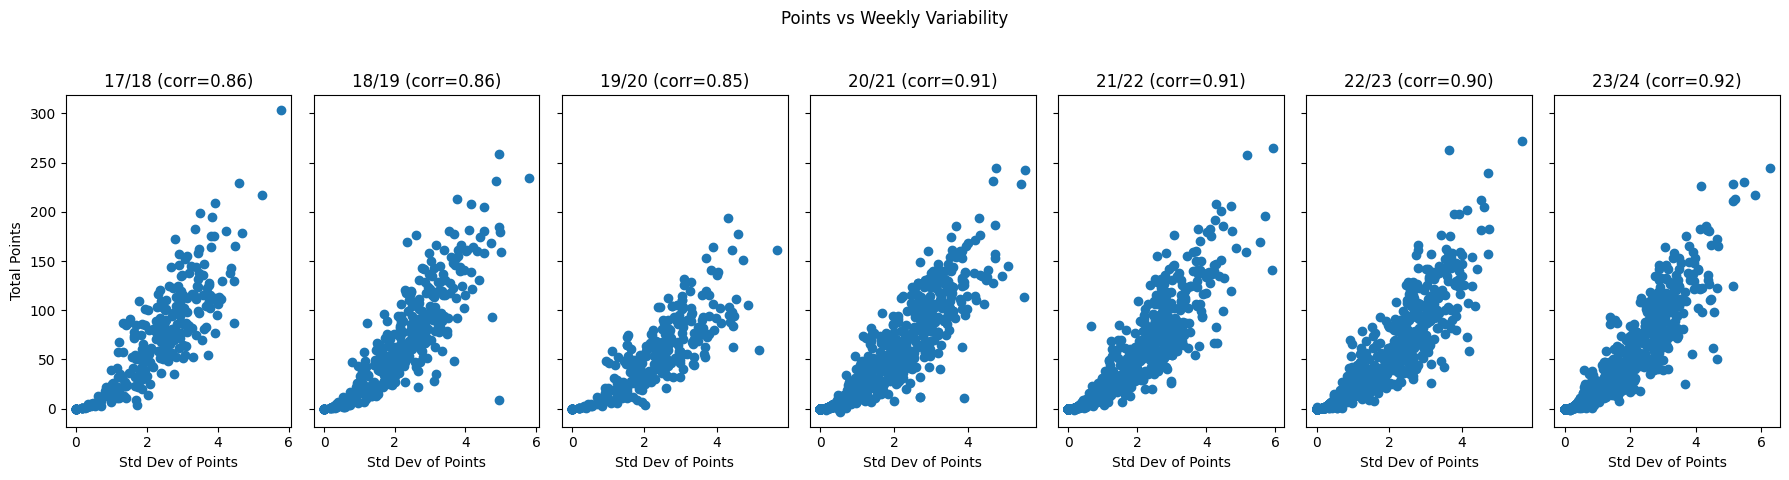

In [16]:
# Investigation of the relationship between a players total points and the variability in their points per week

import matplotlib.pyplot as plt
import numpy as np


def points_variance_subplots(dfs, seasons):
    fig, axes = plt.subplots(1, 7, figsize=(18, 5), sharex=False, sharey=True)

    for i, (df, season) in enumerate(zip(dfs, seasons)):
        df_points = df.groupby("name").agg(
            total=("total_points", "sum"),
            std_dev=("total_points", "std")
        ).dropna()

        corr = np.corrcoef(df_points.std_dev, df_points.total)[0, 1]
        axes[i].scatter(df_points.std_dev, df_points.total)
        axes[i].set_title(f"{season} (corr={corr:.2f})")
        axes[i].set_xlabel("Std Dev of Points")
        if i == 0:
            axes[i].set_ylabel("Total Points")

    fig.suptitle("Points vs Weekly Variability")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

points_variance_subplots([df_17_18, df_18_19, df_19_20,df_20_21, df_21_22, df_22_23, df_23_24],["17/18","18/19","19/20","20/21","21/22", "22/23", "23/24"])


## There is a strong positive correlation (0.90+) between total points and weekly points standard deviation

## This mirrors financial markets:
## → Assets with higher expected returns typically also have higher volatility (go deeper into this, what would the plot look like for financial assets)
## → High-scoring FPL players are like high-return, high-risk assets
## → Low-scoring but consistent players are like low-risk, low-return assets

## This insight is useful for strategy: picking players with high upside involves accepting week-to-week volatility


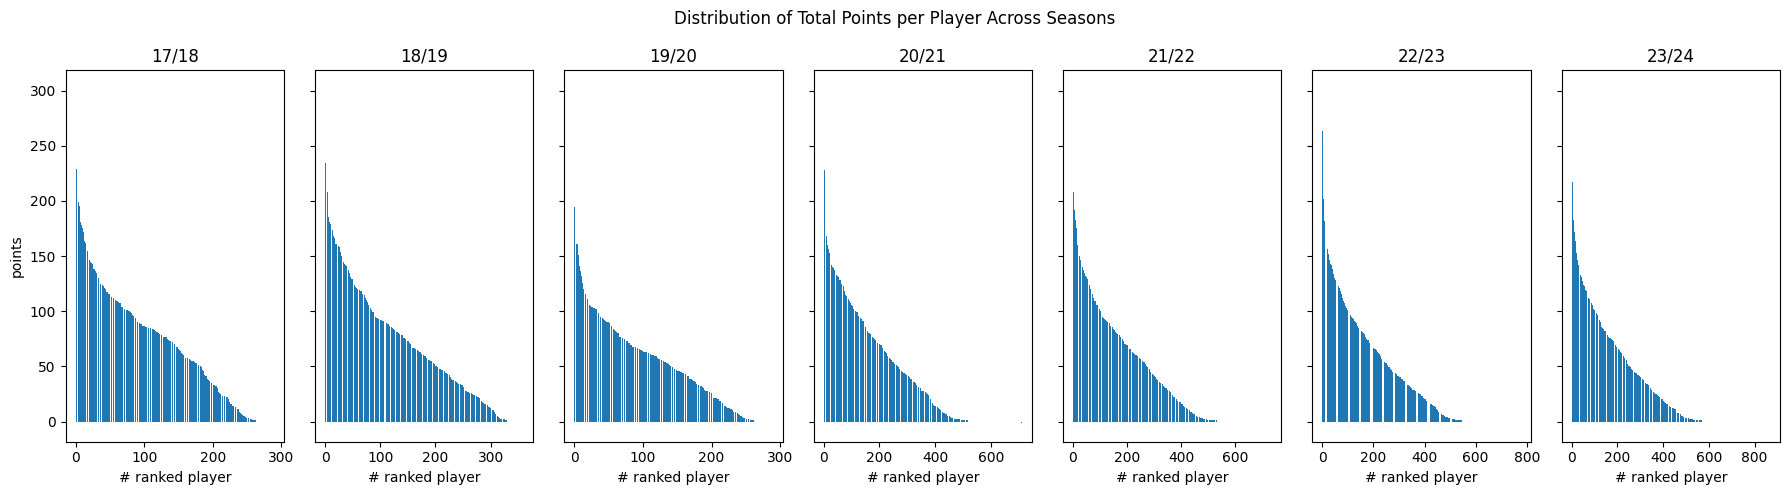

In [17]:
# Distribution of players by points

def points_distribution(dataframes, seasons):
    fig, axs = plt.subplots(1, 7, figsize=(18, 5), sharey=True)

    for i, (df, season) in enumerate(zip(dataframes, seasons)):
        df_bar = df.groupby("name").agg({"total_points": "sum"}).sort_values(by="total_points", ascending=False).reset_index()
        axs[i].bar(range(len(df_bar)), df_bar["total_points"])
        axs[i].set_title(f"{season}")
        axs[i].set_xlabel("# ranked player")
        axs[i].set_ylabel("points" if i == 0 else "")

    fig.suptitle("Distribution of Total Points per Player Across Seasons")
    plt.tight_layout()
    plt.show()

points_distribution([df_17_18, df_18_19, df_19_20,df_20_21, df_21_22, df_22_23, df_23_24],["17/18","18/19","19/20","20/21","21/22", "22/23", "23/24"])


## For each season, we rank players by total points and plot their scores
## Shows the heavy right-skew: very few players accumulate high points, while most score modestly
## Similar to income/wealth distributions — a "power law" or Pareto-like pattern
## Strategy implication: identifying and owning the top outliers is key to success

# can we overlay prices onto this


In [18]:
# distribution of points by players, give some examples (e.g. haaland/salah vs avg players)

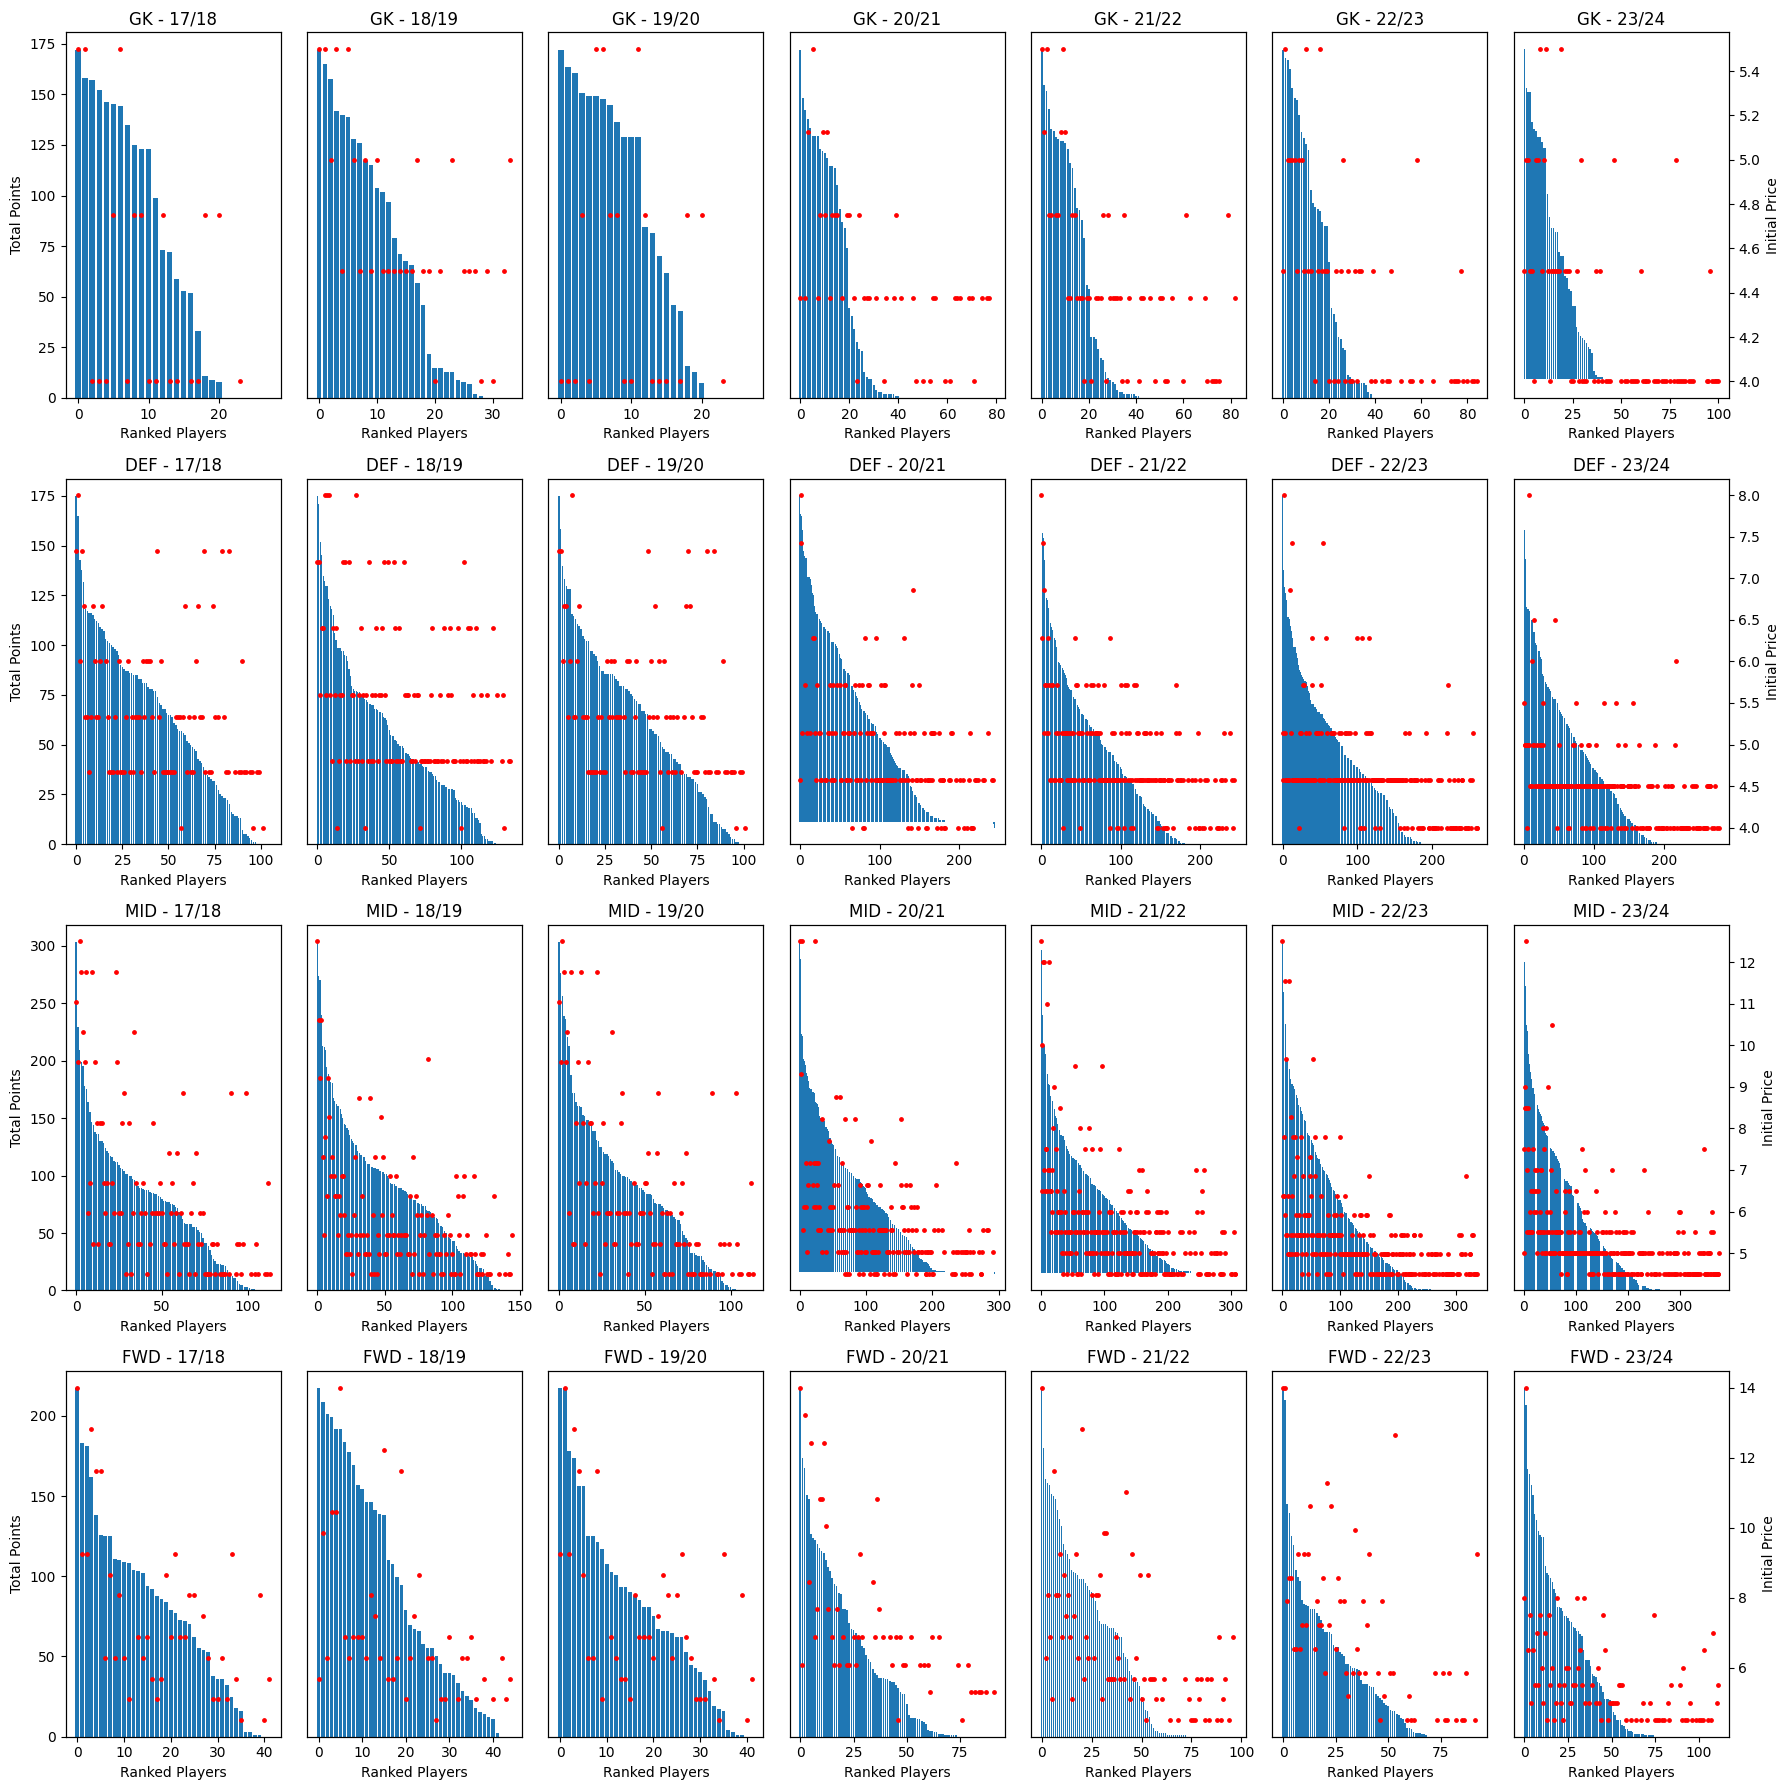

In [19]:
def points_distribution_position(dataframes, season_list):
    positions = ["GK", "DEF", "MID", "FWD"]
    seasons = list(zip(season_list, dataframes))

    fig, axes = plt.subplots(nrows=4, ncols=len(dataframes), figsize=(18, 18), sharey=False, sharex=False)

    for i, pos in enumerate(positions):
        for j, (season, df_season) in enumerate(seasons):
            df_pos = df_season[df_season.position == pos].groupby("name").agg({
                "total_points": "sum",
                "initial_value": "max"}).sort_values(by="total_points", ascending=False).reset_index()

            ax = axes[i, j]
            scatter_ax = ax.twinx()

            ax.bar(df_pos.index, df_pos.total_points, label="Total Points")
            scatter_ax.scatter(df_pos.index, df_pos.initial_value, color="red", s=6, label="Initial Price")

            ax.set_title(f"{pos} - {season}")
            ax.set_xlabel("Ranked Players")

            if j == 0:
                ax.set_ylabel("Total Points")
            else:
                ax.set_ylabel("")
                ax.set_yticklabels([])  # <-- REMOVE left-side numbers
                ax.set_yticks([])

            if j == len(seasons) - 1:
                scatter_ax.set_ylabel("Initial Price")
            else:
                scatter_ax.set_ylabel("")
                scatter_ax.set_yticklabels([])  # <-- REMOVE right-side numbers
                scatter_ax.set_yticks([])

    plt.tight_layout()
    plt.show()


points_distribution_position([df_17_18, df_18_19, df_19_20,df_20_21, df_21_22, df_22_23, df_23_24],["17/18","18/19","19/20","20/21","21/22", "22/23", "23/24"])


In [20]:
###### Modelling Expected Points ######

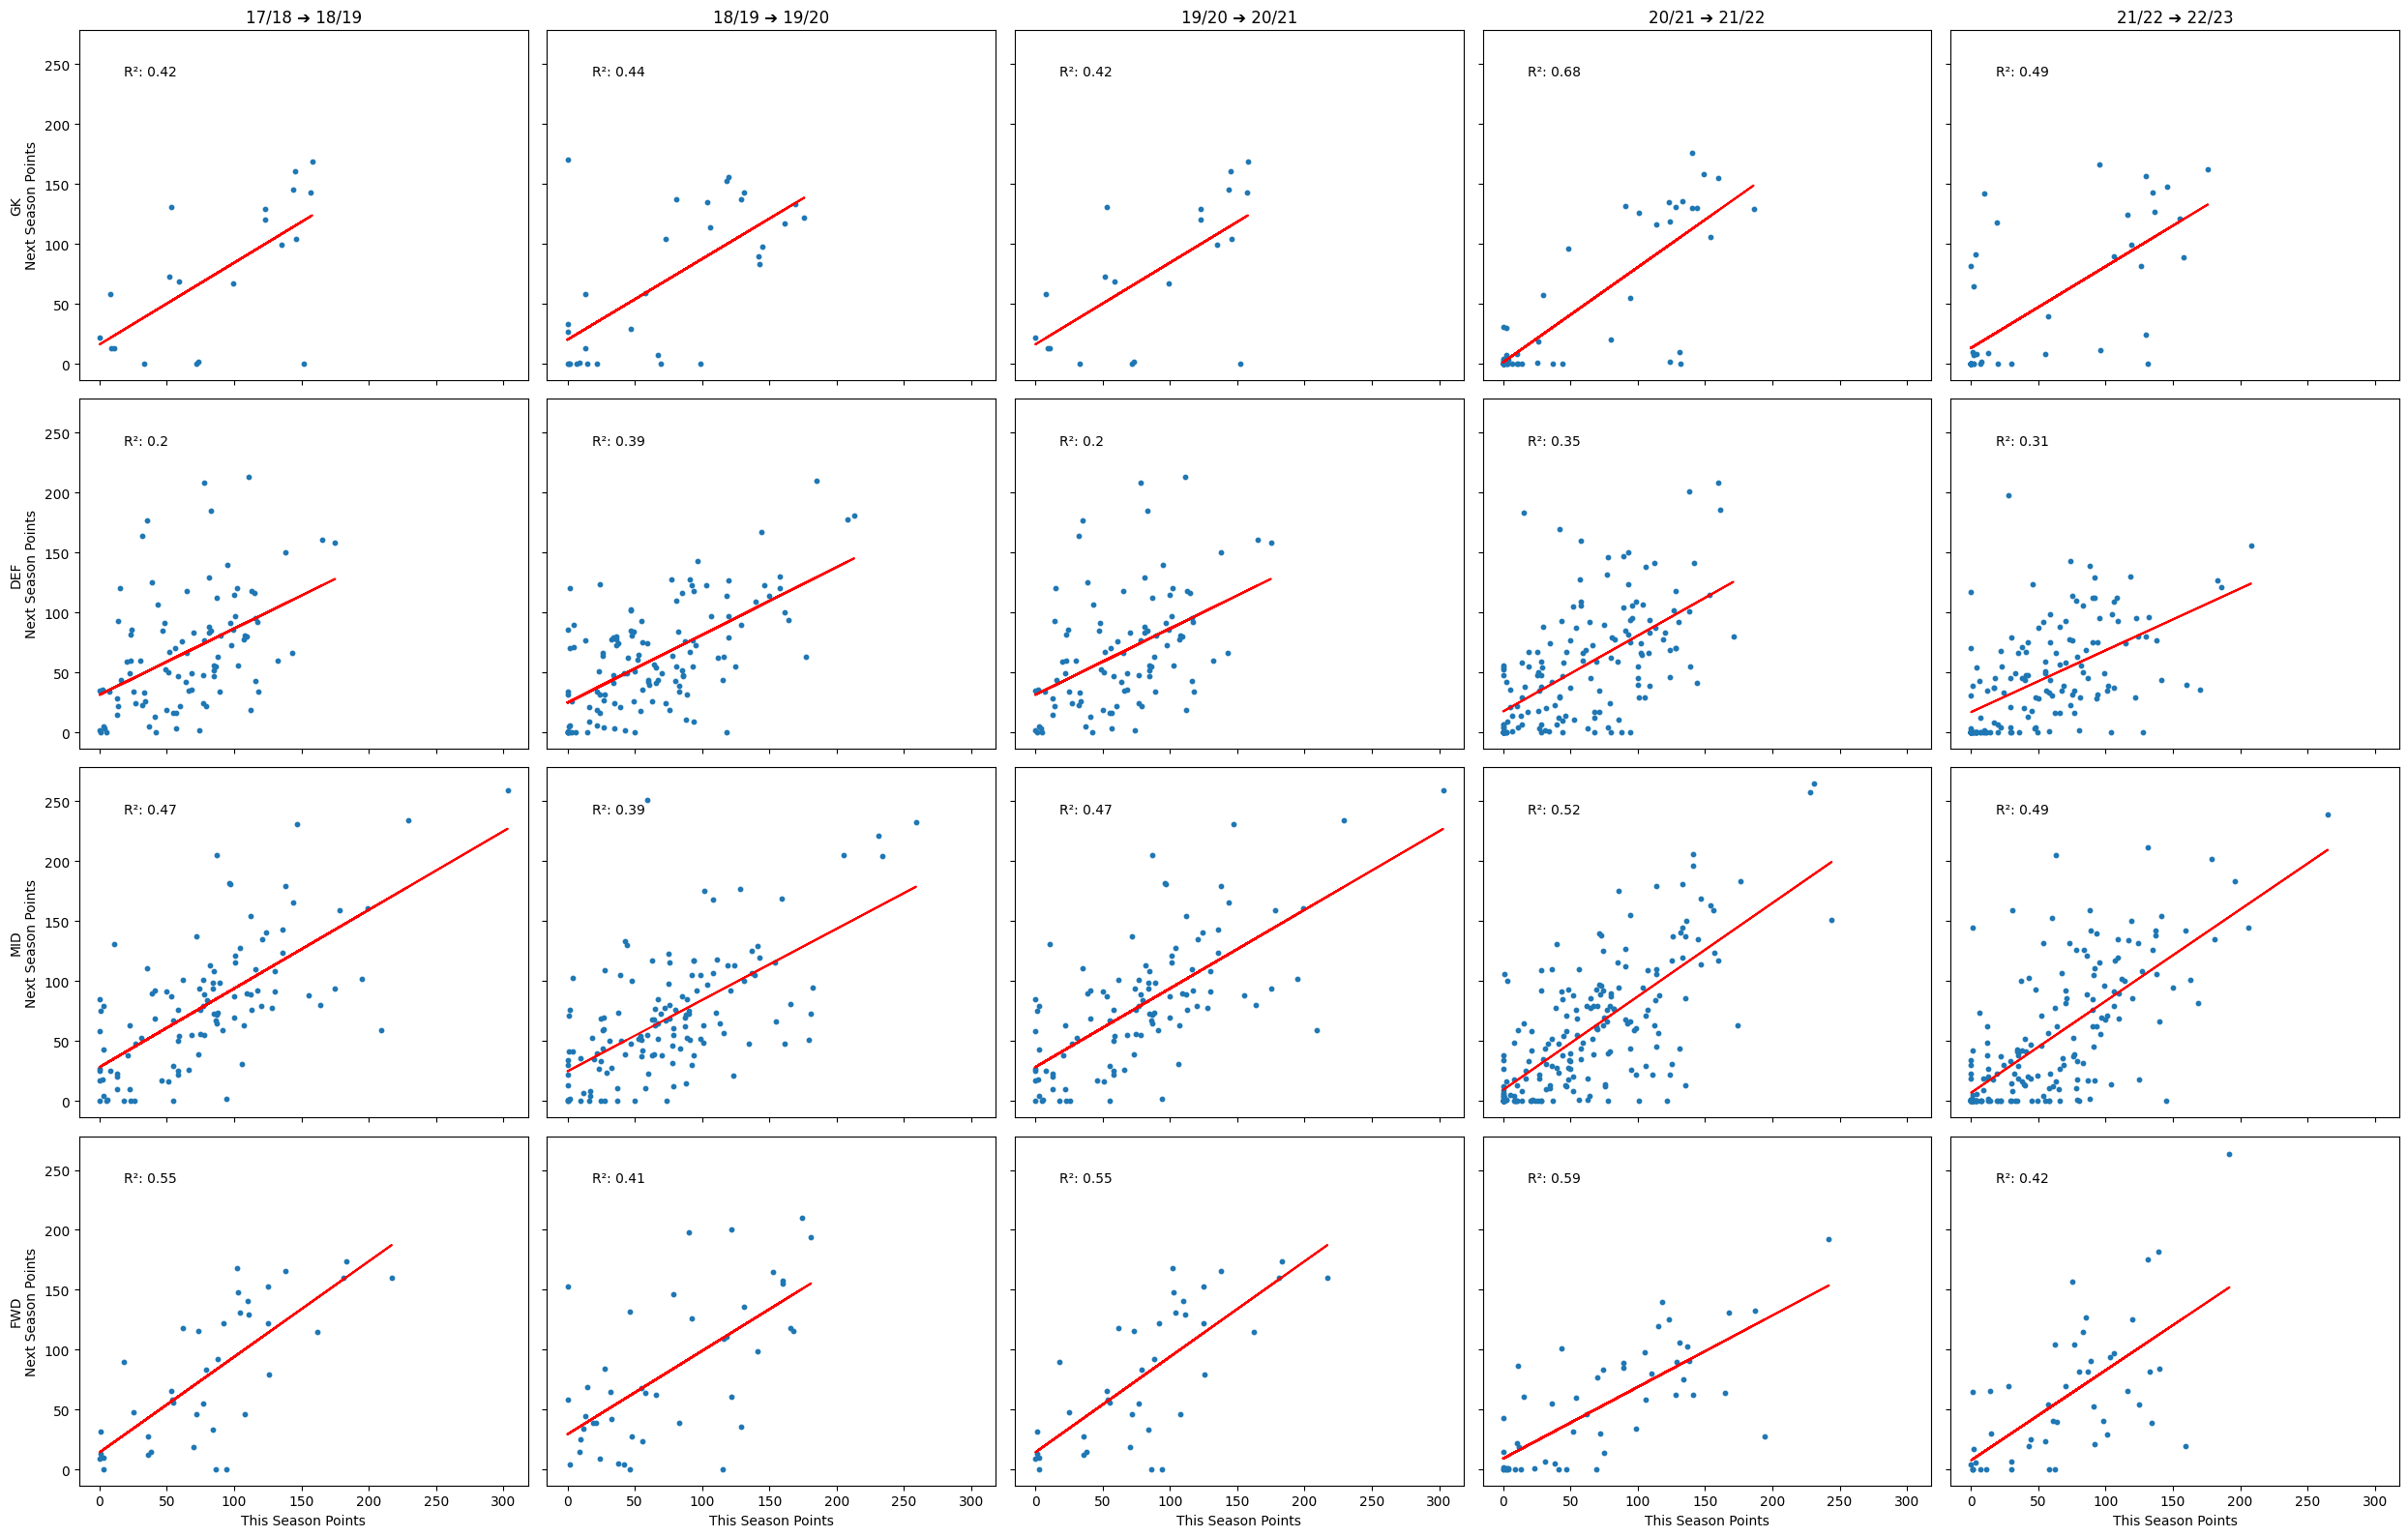

In [21]:
from scipy.stats import linregress

def season_comp_multi(dfs, season_names):
    positions = ["GK","DEF","MID","FWD"]
    fig, axes = plt.subplots(nrows=len(positions), ncols=len(dfs)-2, figsize=(5*(len(dfs)-2), 16), sharex=True, sharey=True)

    for i, position in enumerate(positions):
        for j in range(len(dfs)-2):
            df1 = dfs[j]
            df2 = dfs[j+1]


            df2 = df2[~(df2.next_season_points.isna())]

            df1_pos = df1[df1.position == position]
            df1_pos = df1_pos.groupby("name").agg({
                "season_total_points": "max",
                "next_season_points": "max"
            }).dropna()

            ax = axes[i, j]
            ax.scatter(df1_pos.season_total_points, df1_pos.next_season_points, s=10)

            # Line of best fit
            slope, intercept, r_value, _, _ = linregress(df1_pos.season_total_points, df1_pos.next_season_points)
            ax.plot(df1_pos.season_total_points, slope * df1_pos.season_total_points + intercept, color="red")
            ax.text(0.1, 0.9, f"R²: {round(r_value**2,2)}",transform=ax.transAxes, verticalalignment='top',horizontalalignment='left')

            if j == 0:
                ax.set_ylabel(f"{position}\nNext Season Points")
            if i == 0:
              ax.set_title(f"{season_names[j]} ➔ {season_names[j+1]}")
            if i == 3:
              ax.set_xlabel(f"This Season Points")

    plt.tight_layout()
    plt.show()


season_comp_multi([df_17_18, df_18_19, df_19_20,df_20_21, df_21_22, df_22_23, df_23_24],["17/18","18/19","19/20","20/21","21/22", "22/23", "23/24"])

In [54]:
# Variance Inflation Factor - Multicollinearity Investigation

positions = ["GK","DEF","MID","FWD"]
dfs = [
    (df_17_18, df_18_19, "17/18"),
    (df_18_19, df_19_20, "18/19"),
    (df_19_20, df_20_21, "19/20"),
    (df_20_21, df_21_22, "20/21"),
    (df_21_22, df_22_23, "21/22"),
    (df_22_23, df_23_24, "22/23")]

vif_output = []

for position in positions:
  for df, df_next, season in dfs:
    df_pos = df[df.position == position].dropna()
    df_pos = df_pos.groupby("name").agg({"assists":"sum",
                                    "clean_sheets":"sum",
                                    "goals_conceded":"sum",
                                    "minutes":"sum",
                                    "penalties_saved":"sum",
                                    "red_cards":"sum",
                                    "saves":"sum",
                                    "total_points":"sum",
                                    "next_season_points":"max",
                                    "goals_scored":"sum",
                                    "assists":"sum"})

    X = df_pos[["total_points","goals_scored","assists","minutes","clean_sheets"]]
    X = add_constant(X)

    vif_df = pd.DataFrame()
    vif_df["Variable"] = X.columns
    vif_df["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    vif_df["Season"] = season
    vif_df["Position"] = position

    vif_output.append(vif_df)

vif_table = pd.concat(vif_output, ignore_index=True)
vif_table[(vif_table.Position=="FWD") & (vif_table.Season=="22/23")]

# VIF - quantifies how much a variable's coeffiecint variance is inflated due to multicollinearity with other predictors
# formula - VIF(X) - 1 / (1 - R^2)

        # where R^2 is the R^2 from regressing X on all the other predictors

# i.e. if VIF for a given variable is high, that variable can be explained by the other variables

# results show that when we exlcude total points from this season, the multicollinearity is generally less than 5 so manageable

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF,Season,Position
138,const,3.95,22/23,FWD
139,total_points,93.28,22/23,FWD
140,goals_scored,32.86,22/23,FWD
141,assists,4.46,22/23,FWD
142,minutes,20.25,22/23,FWD
143,clean_sheets,13.43,22/23,FWD


In [25]:
positions = ["GK","DEF","MID","FWD"]
models = {
    "GK": [["season_total_points"],["clean_sheets","minutes","goals_conceded","saves"],["clean_sheets","minutes","goals_conceded"],["clean_sheets","minutes"]],
    "DEF": [["season_total_points"],["clean_sheets","assists","minutes","goals_scored"],["clean_sheets","minutes"]],
    "MID": [["season_total_points"],["minutes","goals_scored","assists"],["goals_scored","assists"]],
    "FWD": [["season_total_points"],["goals_scored","assists","minutes"],["goals_scored","assists"]]}

dataframes = [(df_18_19, df_19_20,"18/19"),(df_19_20, df_20_21,"19/20"),(df_20_21, df_21_22,"20/21"), (df_21_22,df_22_23,"21/22"), (df_22_23,df_23_24,"22/23")]
results = []

for position in positions:
    print("\n")
    for feature_set in models[position]:  # Changed variable name
        for df_current, df_next, year in dataframes:
            df_current_pos = df_current[df_current.position == position]
            df_current_pos = df_current_pos.groupby("name").agg({
                "assists": "sum",
                "clean_sheets": "sum",
                "goals_conceded": "sum",
                "minutes": "sum",
                "saves": "sum",
                "season_total_points": "max",
                "next_season_points":"max",
                "goals_scored": "sum",
                "penalties_saved": "sum",
                "red_cards": "sum"
            }).reset_index().dropna()

            # Merge next season points
            # merged = pd.merge(df_current_pos, next_season_points, on="name", how="inner")
            df_current_pos = df_current_pos[df_current_pos.minutes > 1000]

            # Prepare features/target
            X = df_current_pos[feature_set]  # Use renamed variable
            y = df_current_pos["next_season_points"]

            # Add intercept term
            X = sm.add_constant(X)

            # Fit and evaluate
            model = sm.OLS(y, X).fit()
            adj_r2 = model.rsquared_adj
            results.append({"position":position, "model": ", ".join(feature_set),"year":year,"adj_r2":adj_r2})





df = pd.DataFrame(results)
df.groupby(["position","model"]).agg({"adj_r2":"mean"})


# baseline s2 points = s1 points model ranges from the best model (DEF, FWD) to just as good as the best model within a margin of error (GK, MID)

# Conclusion
# We cannot use linear regression to predict future seasons points better than the naive model of s2 points = s1 points using the data we have

adj_r2
position model                                                 
DEF      clean_sheets, assists, minutes, goals_scored  0.185680
         clean_sheets, minutes                         0.174701
         season_total_points                           0.223675
FWD      goals_scored, assists                         0.194631
         goals_scored, assists, minutes                0.184411
         season_total_points                           0.219706
GK       clean_sheets, minutes                         0.242951
         clean_sheets, minutes, goals_conceded         0.237947
         clean_sheets, minutes, goals_conceded, saves  0.272398
         season_total_points                           0.265129
MID      goals_scored, assists                         0.352582
         minutes, goals_scored, assists                0.369597
         season_total_points                           0.356490

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Season pairs and position list
season_pairs = [
    ("2017/18", df_17_18, df_18_19),
    ("2018/19", df_18_19, df_19_20),
    ("2019/20", df_19_20, df_20_21),
    ("2020/21", df_20_21, df_21_22),
    ("2021/22", df_21_22, df_22_23),
    ("2022/23", df_22_23, df_23_24),
]
positions = ["FWD", "MID", "DEF", "GK"]

# To collect results
results = []

for season_label, df_current, df_next in season_pairs:
    for pos in positions:

        # Filter and aggregate current season data
        df_current_pos = df_current[df_current["position"] == pos]
        df_current_pos = df_current_pos.groupby("name").agg({
            "assists": "sum", "clean_sheets": "sum", "goals_conceded": "sum", "minutes": "sum",
            "saves": "sum", "season_total_points": "max", "goals_scored": "sum", "penalties_saved": "sum",
            "red_cards": "sum", "bonus": "sum", "bps": "sum", "creativity": "sum", "ict_index": "sum",
            "influence": "sum", "own_goals": "sum", "penalties_missed": "sum", "selected": "sum",
            "threat": "sum", "value": "sum", "next_season_points":"max"
        }).reset_index().dropna()

        # Merge with next season points
        # merged = pd.merge(df_current_pos, next_season_points, on="name", how="inner")
        # merged = merged[merged.minutes > 1000]


        features = ["assists","clean_sheets","goals_conceded","minutes","saves",
                    "goals_scored","penalties_saved","red_cards","bonus","bps",
                    "creativity","ict_index","influence","own_goals",
                    "penalties_missed","selected","threat","value","season_total_points"]

        X = df_current_pos[features]
        y = df_current_pos["next_season_points"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

        # === Naive model using only total_points ===
        naive_model = Pipeline([
            ("scaler", StandardScaler()),
            ("lasso", LassoCV(cv=5, max_iter=50000))])

        naive_model.fit(X_train[["season_total_points"]], y_train)
        y_pred_naive = naive_model.predict(X_test[["season_total_points"]])
        r2_naive = r2_score(y_test, y_pred_naive)

        # === Full Lasso model ===
        lasso_model = Pipeline([
            ("scaler", StandardScaler()),
            ("lasso", LassoCV(cv=5, max_iter=50000))])

        lasso_model.fit(X_train[features], y_train)
        y_pred_lasso = lasso_model.predict(X_test[features])
        r2_lasso = r2_score(y_test, y_pred_lasso)

        # Save results
        results.append({
            "Season": season_label,
            "Position": pos,
            "Naive R²": round(r2_naive, 3),
            "Lasso R²": round(r2_lasso, 3),
            "Improvement": round(r2_lasso - r2_naive, 3)})

# Show as DataFrame
summary_df = pd.DataFrame(results)
summary_df.sort_values(by="Position")


# Conclusion -> we cannot outperform the naive model using lasso regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.48002959578298, tolerance: 11.21854193548387
  model = cd_fast.enet_coordinate_descent_gram(


,Season,Position,Naive R²,Lasso R²,Improvement
2,2017/18,DEF,0.109,0.065,-0.044
18,2021/22,DEF,0.267,0.259,-0.007
6,2018/19,DEF,0.154,0.092,-0.061
10,2019/20,DEF,0.109,0.085,-0.024
22,2022/23,DEF,0.417,0.358,-0.058
14,2020/21,DEF,0.224,0.293,0.069
0,2017/18,FWD,0.764,0.636,-0.127
20,2022/23,FWD,-0.838,-0.569,0.269
4,2018/19,FWD,0.093,0.183,0.090
16,2021/22,FWD,0.582,0.568,-0.014


In [27]:
#### Optimisation ####

In [28]:
import cvxpy as cp

# Portfolio Optimisation - Team Builder
# This is working now

def optimal_team_buidler(df, season):
  # Preprocess data
  df_filtered = df[(df.in_next_season) & (df.team_in_next_season)][['name', 'position', 'team','next_season_team', 'total_points','next_season_points', 'initial_value', 'season_total_points', 'season_avg_points',
    'season_vol_points', 'season_minutes', 'next_season_initial_value','in_next_season', 'team_in_next_season', 'master_name']]

  # Get top 100 players by max season minutes
  top_players = (df_filtered.groupby('name', as_index=False)['season_minutes'].max()
      .sort_values(by='season_minutes', ascending=False)
      .head(100))

  # Merge to get full rows and drop duplicates
  df_top = df_filtered.merge(top_players[['name']], on='name', how='inner')
  df_top = df_top.drop_duplicates(subset='name')

  # Define optimization variables over df_top
  squad = cp.Variable(len(df_top), boolean=True)
  starting = cp.Variable(len(df_top), boolean=True)
  bench = squad - starting

  # Objective: Maximize starting 11's points minus risk
  lambda_risk = 0  # Adjust risk aversion as needed
  objective = cp.Maximize(
      (0.9)*df_top['season_avg_points'].values @ starting +
      (0.1)*df_top['season_avg_points'].values @ bench
      - lambda_risk * (df_top['season_vol_points'].values @ starting)
  )

  # Position masks using df_top
  position_mask = {
      pos: (df_top['position'] == pos).values
      for pos in ['GK', 'DEF', 'MID', 'FWD']
  }

  # Constraints
  constraints = [
      cp.sum(squad) == 15,
      cp.sum(starting) == 11,
      starting <= squad,
      df_top['next_season_initial_value'].values @ squad <= 100,
      # Squad composition
      cp.sum(squad[position_mask['GK']]) == 2,
      cp.sum(squad[position_mask['DEF']]) == 5,
      cp.sum(squad[position_mask['MID']]) == 5,
      cp.sum(squad[position_mask['FWD']]) == 3,
      # Starting 11 formation
      cp.sum(starting[position_mask['GK']]) == 1,
      cp.sum(starting[position_mask['DEF']]) >= 3,
      cp.sum(starting[position_mask['MID']]) >= 2,
      cp.sum(starting[position_mask['FWD']]) >= 1,
      cp.sum(starting[position_mask['DEF'] | position_mask['MID'] | position_mask['FWD']]) == 10,
      # Max 3 players per team
      *[cp.sum(squad[df_top['next_season_team'] == team]) <= 3 for team in df_top['next_season_team'].unique()]
  ]

  # Solve
  prob = cp.Problem(objective, constraints)
  prob.solve(solver=cp.SCIPY, scipy_options={'method': 'highs'})

  if prob.status == 'optimal':
      df_top['squad'] = squad.value.round()
      df_top['starting'] = starting.value.round()
      optimized_squad = df_top[df_top['squad'] == 1]
      optimized_starting = optimized_squad[optimized_squad['starting'] == 1]
      # Append results or analyze here
  else:
      print(f"No solution for {season}")

  return optimized_squad[['name','squad','starting', 'position','next_season_team', 'season_total_points','next_season_points', 'initial_value', 'next_season_initial_value']]


optimal_team_1718 = optimal_team_buidler(df_17_18, "17/18")
optimal_team_1819 = optimal_team_buidler(df_18_19, "18/19")
optimal_team_1920 = optimal_team_buidler(df_19_20, "19/20")
optimal_team_2021 = optimal_team_buidler(df_20_21, "20/21")
optimal_team_2122 = optimal_team_buidler(df_21_22, "21/22")
optimal_team_2223 = optimal_team_buidler(df_22_23, "22/23")



In [42]:
optimal_team_2021.next_season_initial_value.sum()

np.float64(100.0)

In [48]:
optimal_teams = [
    optimal_team_1718,
    optimal_team_1819,
    optimal_team_1920,
    optimal_team_2021,
    optimal_team_2122,
    optimal_team_2223]


for df in optimal_teams:
  df["next_season_starting_11_points"] = df["next_season_points"] * df["starting"]



In [49]:
optimal_team_1718

,name,squad,starting,position,next_season_team,season_total_points,next_season_points,initial_value,next_season_initial_value,Next_season_starting_11_points,next_season_starting_11_points
14,Ben Davies,1.0,1.0,DEF,Spurs,143,66.0,5.5,6.0,66.0,66.0
16,Callum Wilson,1.0,0.0,FWD,Bournemouth,102,168.0,6.0,6.0,0.0,0.0
22,César Azpilicueta,1.0,1.0,DEF,Chelsea,175,158.0,6.5,6.5,158.0,158.0
23,Dale Stephens,1.0,0.0,MID,Brighton,87,65.0,4.5,4.5,0.0,0.0
40,Héctor Bellerín,1.0,1.0,DEF,Arsenal,132,60.0,6.0,5.5,60.0,60.0
46,James Tomkins,1.0,0.0,DEF,Crystal Palace,99,86.0,4.5,4.5,0.0,0.0
47,Jamie Vardy,1.0,1.0,FWD,Leicester,183,174.0,8.5,9.0,174.0,174.0
61,Luka Milivojevic,1.0,1.0,MID,Crystal Palace,144,166.0,5.0,6.5,166.0,166.0
63,Marcos Alonso,1.0,1.0,DEF,Chelsea,165,161.0,7.0,6.5,161.0,161.0
66,Mathew Ryan,1.0,-0.0,GK,Brighton,146,104.0,4.5,4.5,-0.0,-0.0


In [30]:
import numpy as np
import pandas as pd
import random

result_points_1718 = []
result_points_1819 = []
result_points_1920 = []
result_points_2021 = []
result_points_2122 = []
result_points_2223 = []

for df, season in [(df_17_18, "17/18"), (df_18_19, "18/19"), (df_19_20, "19/20"), (df_20_21, "20/21"), (df_21_22, "21/22"), (df_22_23, "22/23")]:
  for i in range(10000):
    # 1. Sample players first
    sampled_df = df[(df.GW == 1) &(df.in_next_season) &(df.team_in_next_season) & (~df.next_season_initial_value.isna())].sample(150).sort_values("next_season_initial_value", ascending=False)

    # 2. Setup
    max_allowed = {"GK": 1, "DEF": 3, "MID": 4, "FWD": 3}
    budget = 82
    expensive_price = 9 # 8 if season == "22/23" else 9
    cheap_price = 6

    # 3. Randomly choose quotas
    while True:
        num_expensive = np.random.choice([1, 2, 3])
        num_cheap = np.random.choice([2,3,4])
        num_medium = 11 - num_expensive - num_cheap
        if num_medium >= 0:  # must be non-negative
            break

    # 4. Initialize counters
    position_count = {"GK": 0, "DEF": 0, "MID": 0, "FWD": 0}
    club_count = {}
    expensive_count = medium_count = cheap_count = 0
    squad = []
    players_chosen = set()

    # 6. Main loop
    for idx, player in sampled_df.iterrows():
        price = player["next_season_initial_value"]
        position = player["position"]
        team = player["team"]
        name = player["name"]

        if budget - price < 0: continue
        if position_count[position] >= max_allowed[position]: continue
        if club_count.get(team, 0) >= 3: continue
        if name in players_chosen: continue

        # Expensive / Medium / Cheap rules
        if price >= expensive_price:
            if expensive_count >= num_expensive: continue
            expensive_count += 1
        elif price < cheap_price:
            if cheap_count >= num_cheap: continue
            cheap_count += 1
        else:
            if medium_count >= num_medium: continue
            medium_count += 1

        # Accept player
        squad.append({
            "name": name,
            "position": position,
            "team": team,
            "next_season_initial_value": price,
            "next_season_points": player["next_season_points"]
        })

        players_chosen.add(name)
        budget -= price
        position_count[position] += 1
        club_count[team] = club_count.get(team, 0) + 1

        if len(squad) == 11 and 0 <= budget <= 4:
          valid_squad_df = pd.DataFrame(squad)
          if season == "17/18": result_points_1718.append(valid_squad_df["next_season_points"].sum())
          elif season == "18/19": result_points_1819.append(valid_squad_df["next_season_points"].sum())
          elif season == "19/20": result_points_1920.append(valid_squad_df["next_season_points"].sum())
          elif season == "20/21": result_points_2021.append(valid_squad_df["next_season_points"].sum())
          elif season == "21/22": result_points_2122.append(valid_squad_df["next_season_points"].sum())
          elif season == "22/23": result_points_2223.append(valid_squad_df["next_season_points"].sum())


          break




In [31]:
##### Results Visualisation #####

In [32]:
np.sum(optimal_team_1718[["next_season_points"]])[0]

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-32-66ca1866d1b2>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sum(optimal_team_1718[["next_season_points"]])[0]


np.float64(1802.0)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-50-b7cd6c5a28ec>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i, (optimal, result, season) in enumerate([(np.sum(optimal_team_1718[["next_season_starting_11_points"]])[0], result_points_1718, "18/19"),
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass 

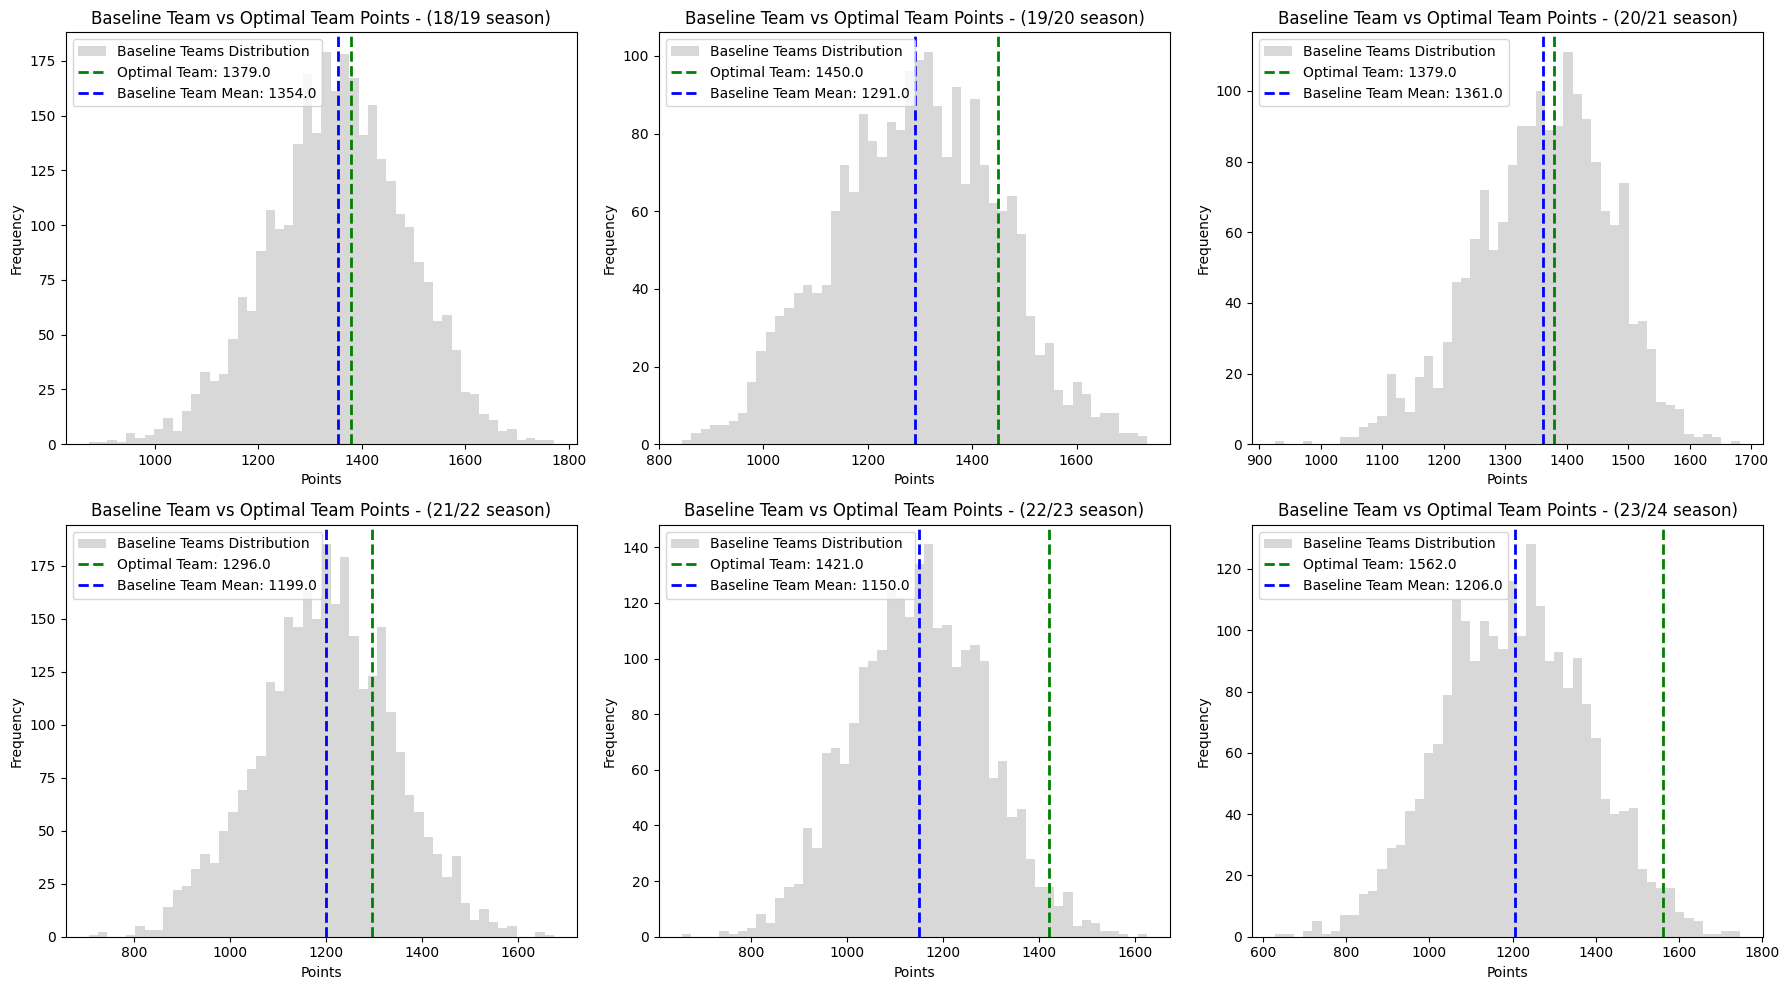

In [50]:
import matplotlib.pyplot as plt

# Create a figure and axis grid (2 rows and 3 columns for 6 seasons)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the data and plot on each subplot
for i, (optimal, result, season) in enumerate([(np.sum(optimal_team_1718[["next_season_starting_11_points"]])[0], result_points_1718, "18/19"),
                                               (np.sum(optimal_team_1819[["next_season_starting_11_points"]])[0], result_points_1819, "19/20"),
                                               (np.sum(optimal_team_1920[["next_season_starting_11_points"]])[0], result_points_1920, "20/21"),
                                               (np.sum(optimal_team_2021[["next_season_starting_11_points"]])[0], result_points_2021, "21/22"),
                                               (np.sum(optimal_team_2122[["next_season_starting_11_points"]])[0], result_points_2122, "22/23"),
                                               (np.sum(optimal_team_2223[["next_season_starting_11_points"]])[0], result_points_2223, "23/24")]):
    ax = axes[i]

    # Sample data (replace these with your actual data)
    ax.hist(result, bins=50, alpha=0.3, label='Baseline Teams Distribution', color='grey')

    # Add the optimal team points as a vertical line
    ax.axvline(optimal, color='green', linestyle='dashed', linewidth=2, label=f'Optimal Team: {optimal}')

    mean = round(sum(result)/len(result), 0)
    ax.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Baseline Team Mean: {mean}')

    # Labels and title
    ax.set_title(f"Baseline Team vs Optimal Team Points - ({season} season)")
    ax.set_xlabel("Points")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
